<a href="https://colab.research.google.com/github/JanjaTomic/RV-DZ/blob/main/vizualizacija.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install kaggle

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
import zipfile
import os

In [151]:
uploaded = files.upload()

source_path = '/content/kaggle.json'
destination_path = '/root/.kaggle/kaggle.json'
kaggle_dir = '/root/.kaggle/'
if not os.path.exists(kaggle_dir):
    os.makedirs(kaggle_dir)
os.rename(source_path, destination_path)

Saving kaggle.json to kaggle.json


In [8]:
! kaggle datasets download -d sjleshrac/airlines-customer-satisfaction

  0% 0.00/1.64M [00:00<?, ?B/s]
100% 1.64M/1.64M [00:00<00:00, 118MB/s]


In [11]:
with zipfile.ZipFile('/content/airlines-customer-satisfaction.zip', 'r') as zip_ref:
  zip_ref.extractall('/content')

In [13]:
df = pd.read_csv("Invistico_Airline.csv")

In [14]:
print(df.head())

  satisfaction  Gender   Customer Type  Age   Type of Travel     Class  \
0    satisfied  Female  Loyal Customer   65  Personal Travel       Eco   
1    satisfied    Male  Loyal Customer   47  Personal Travel  Business   
2    satisfied  Female  Loyal Customer   15  Personal Travel       Eco   
3    satisfied  Female  Loyal Customer   60  Personal Travel       Eco   
4    satisfied  Female  Loyal Customer   70  Personal Travel       Eco   

   Flight Distance  Seat comfort  Departure/Arrival time convenient  \
0              265             0                                  0   
1             2464             0                                  0   
2             2138             0                                  0   
3              623             0                                  0   
4              354             0                                  0   

   Food and drink  ...  Online support  Ease of Online booking  \
0               0  ...               2                       3

In [103]:
print(df.describe())

                 Age  Flight Distance   Seat comfort  \
count  129880.000000    129880.000000  129880.000000   
mean       39.427957      1981.409055       2.838597   
std        15.119360      1027.115606       1.392983   
min         7.000000        50.000000       0.000000   
25%        27.000000      1359.000000       2.000000   
50%        40.000000      1925.000000       3.000000   
75%        51.000000      2544.000000       4.000000   
max        85.000000      6951.000000       5.000000   

       Departure/Arrival time convenient  Food and drink  Gate location  \
count                      129880.000000   129880.000000  129880.000000   
mean                            2.990645        2.851994       2.990422   
std                             1.527224        1.443729       1.305970   
min                             0.000000        0.000000       0.000000   
25%                             2.000000        2.000000       2.000000   
50%                             3.000000     

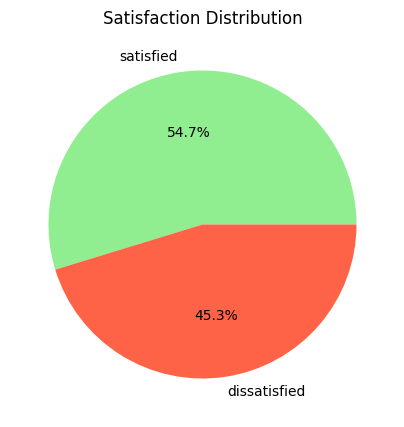

In [37]:
# Visualize satisfaction distribution
plt.figure(figsize=(5, 5))
satisfaction_counts = df['satisfaction'].value_counts()
plt.pie(satisfaction_counts, labels=satisfaction_counts.index, autopct='%1.1f%%', colors=['lightgreen', 'tomato'])
plt.title('Satisfaction Distribution')
plt.show()

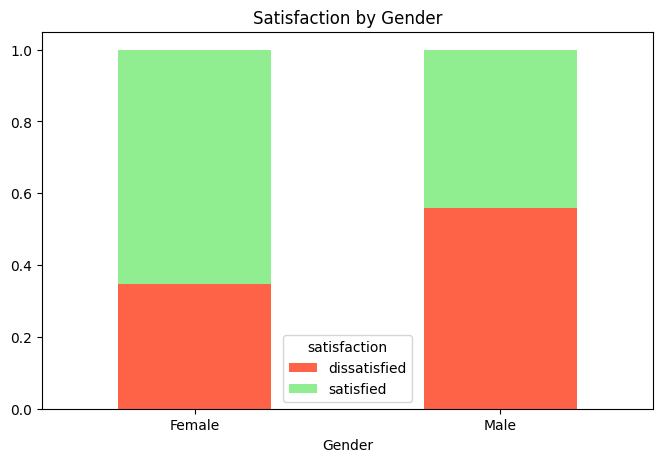

In [107]:
plt.figure(figsize=(13, 13))  # Set the size of the figure
plt.subplot(3, 2, 2)
satisfaction_by_gender = df.groupby('Gender')['satisfaction'].value_counts(normalize=True).unstack()
satisfaction_by_gender.plot(kind='bar', stacked=True, color=['tomato','lightgreen'], ax=plt.gca())
plt.title('Satisfaction by Gender')
plt.xticks(rotation=0)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

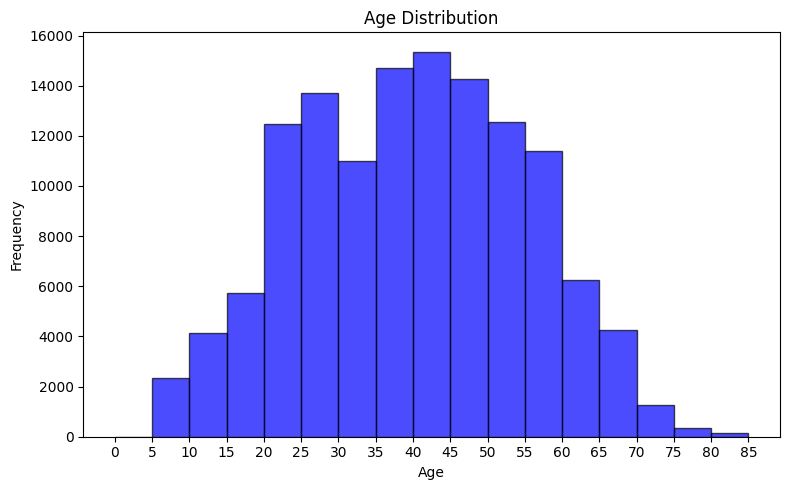

In [77]:
plt.figure(figsize=(8, 5))
bin_edges = range(0, df['Age'].max() + 5, 5)
plt.hist(df['Age'], bins=bin_edges, color='blue', edgecolor='black', alpha=0.7)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.xticks(range(0, df['Age'].max() + 5, 5))
plt.tight_layout()
plt.show()

In [149]:
plt.figure(figsize=(5, 5))
class_counts = df['Class'].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=['sandybrown', 'springgreen', 'mediumorchid'])
plt.title('Distribution of Passenger Class')
plt.axis('equal')
plt.tight_layout()
plt.show()

KeyError: 'Class'

<Figure size 500x500 with 0 Axes>

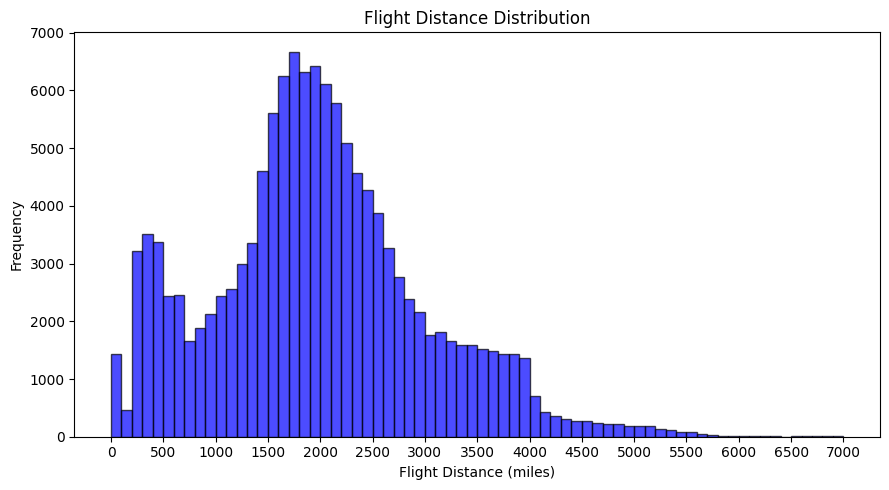

In [106]:
plt.figure(figsize=(9, 5))
bin_edges = range(0, df['Flight Distance'].max() + 100, 100)
plt.hist(df['Flight Distance'], bins=bin_edges, color='blue', edgecolor='black', alpha=0.7)
plt.title('Flight Distance Distribution')
plt.xlabel('Flight Distance (miles)')
plt.ylabel('Frequency')
plt.xticks(range(0, df['Flight Distance'].max() + 500, 500))
plt.tight_layout()
plt.show()